# ARNAUD MAGARIAN - 2021 - ESILV A5

# Estimation of obesity levels based on eating habits and physical condition Data Set

## Libraries needed throughout the project

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

## Importation of the dataset

The dataset can be found following this link : https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+#

According to the given description: 
* "This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform."

In [2]:
types = {"Gender":str,
         "Age":int,
         "Height":float,
         "Weight":float,
         "family_history_with_overweight":str,
         "FAVC":str,
         "FCVC":int,
         "NCP":int,
         "CAEC":str,
         "SMOKE":str,
         "CH2O":int,
         "SCC":str,
         "FAF":int,
         "TUE":int,
         "CALC":str,
         "MTRANS":str,
         "NObeyesdad":str
        }

obesity = pd.read_csv("dataset.csv", dtype = types, sep=";")

In [3]:
obesity

Gender  Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0     Female   21    1.62   64.00                            yes   no     2   
1     Female   21    1.52   56.00                            yes   no     3   
2       Male   23    1.80   77.00                            yes   no     2   
3       Male   27    1.80   87.00                             no   no     3   
4       Male   22    1.78   89.80                             no   no     2   
...      ...  ...     ...     ...                            ...  ...   ...   
2106  Female   21    1.71  131.41                            yes  yes     3   
2107  Female   22    1.75  133.74                            yes  yes     3   
2108  Female   23    1.75  133.69                            yes  yes     3   
2109  Female   24    1.74  133.35                            yes  yes     3   
2110  Female   24    1.74  133.47                            yes  yes     3   

      NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0       3  Sometimes    no     2   no    0    1          no   
1       3  Sometimes   yes     3  yes    3    0   Sometimes   
2       3  Sometimes    no     2   no    2    1  Frequently   
3       3  Sometimes    no     2   no    2    0  Frequently   
4       1  Sometimes    no     2   no    0    0   Sometimes   
...   ...        ...   ...   ...  ...  ...  ...         ...   
2106    3  Sometimes    no     2   no    2    1   Sometimes   
2107    3  Sometimes    no     2   no    1    1   Sometimes   
2108    3  Sometimes    no     2   no    1    1   Sometimes   
2109    3  Sometimes    no     3   no    1    1   Sometimes   
2110    3  Sometimes    no     3   no    1    1   Sometimes   

                     MTRANS           NObeyesdad  
0     Public_Transportation        Normal_Weight  
1     Public_Transportation        Normal_Weight  
2     Public_Transportation        Normal_Weight  
3                   Walking   Overweight_Level_I  
4     Public_Transportation  Overweight_Level_II  
...                     ...                  ...  
2106  Public_Transportation     Obesity_Type_III  
2107  Public_Transportation     Obesity_Type_III  
2108  Public_Transportation     Obesity_Type_III  
2109  Public_Transportation     Obesity_Type_III  
2110  Public_Transportation     Obesity_Type_III  

[2111 rows x 17 columns]

In [4]:
type(obesity)

pandas.core.frame.DataFrame

In [5]:
obesity.describe()

Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.315964     1.701620    86.586035     2.423496     2.687826   
std       6.357078     0.093368    26.191163     0.583905     0.809680   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      20.000000     1.630000    65.470000     2.000000     3.000000   
50%      23.000000     1.700000    83.000000     2.000000     3.000000   
75%      26.000000     1.770000   107.430000     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.014685     1.006632     0.664614  
std       0.688616     0.895462     0.674009  
min       1.000000     0.000000     0.000000  
25%       2.000000     0.000000     0.000000  
50%       2.000000     1.000000     1.000000  
75%       2.000000     2.000000     1.000000  
max       3.000000     3.000000     2.000000

In [6]:
obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int32  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   int32  
 7   NCP                             2111 non-null   int32  
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   int32  
 11  SCC                             2111 non-null   object 
 12  FAF                             21

## Importation of variables' definitions

In [7]:
DataSignification = pd.read_csv("DataSignification.csv", sep=";")

In [8]:
DataSignification

Variable                              Signification
0                           Gender                              Person gender
1                              Age                                 Person age
2                           Height                              Person height
3                           Weight                              Person weight
4   family_history_with_overweight     Obesity history in the person's family
5                             FAVC  Frequent consumption of high caloric food
6                             FCVC     Frequency of consumption of vegetables
7                              NCP                       Number of main meals
8                             CAEC          Consumption of food between meals
9                            SMOKE                       Is the peson smoking
10                            CH2O                 Consumption of water daily
11                            CALC                     Consumption of alcohol
12                             SCC            Calories consumption monitoring
13                             FAF                Physical activity frequency
14                             TUE              Time using technology devices
15                          MTRANS                        Transportation used
16                      NObeyesdad                             Wheight status

In [9]:
type(DataSignification)

pandas.core.frame.DataFrame

## Creating an array of colors to be used when ploting

In [10]:
myBlueColors1 = ["#98E3FE",
                 "#57D1FF",
                 "#4CB7DF",
                 "#419DBF",
                 "#36839F",
                 "#2B6980",
                 "#214E60",
                 "#163440",
                 "#0B1A20"
                ]

myColor1 = "#36839F"
myColor2 = "#FFA3D2"
myColor3 = "#9F366C"

myPinkColors = ["#FFA3D2",
                "#FF57AD",
                "#DF4C97",
                "#BF4182",
                "#9F366C",
                "#802B56",
                "#602141",
                "#40162B",
                "#200B16"
                 ]

myBlueColors2 = ["#C3EEFF",
                 "#8EDFFF",
                 "#61D2FF",
                 "#37C6FF",
                 "#00B6FF",
                 "#0096D2",
                 "#0078A8"
                ]

## Some data visualization
Using the unmodified imported dataset, here are some charts / plots

### Pie plots to have a better idea of the dataset construction

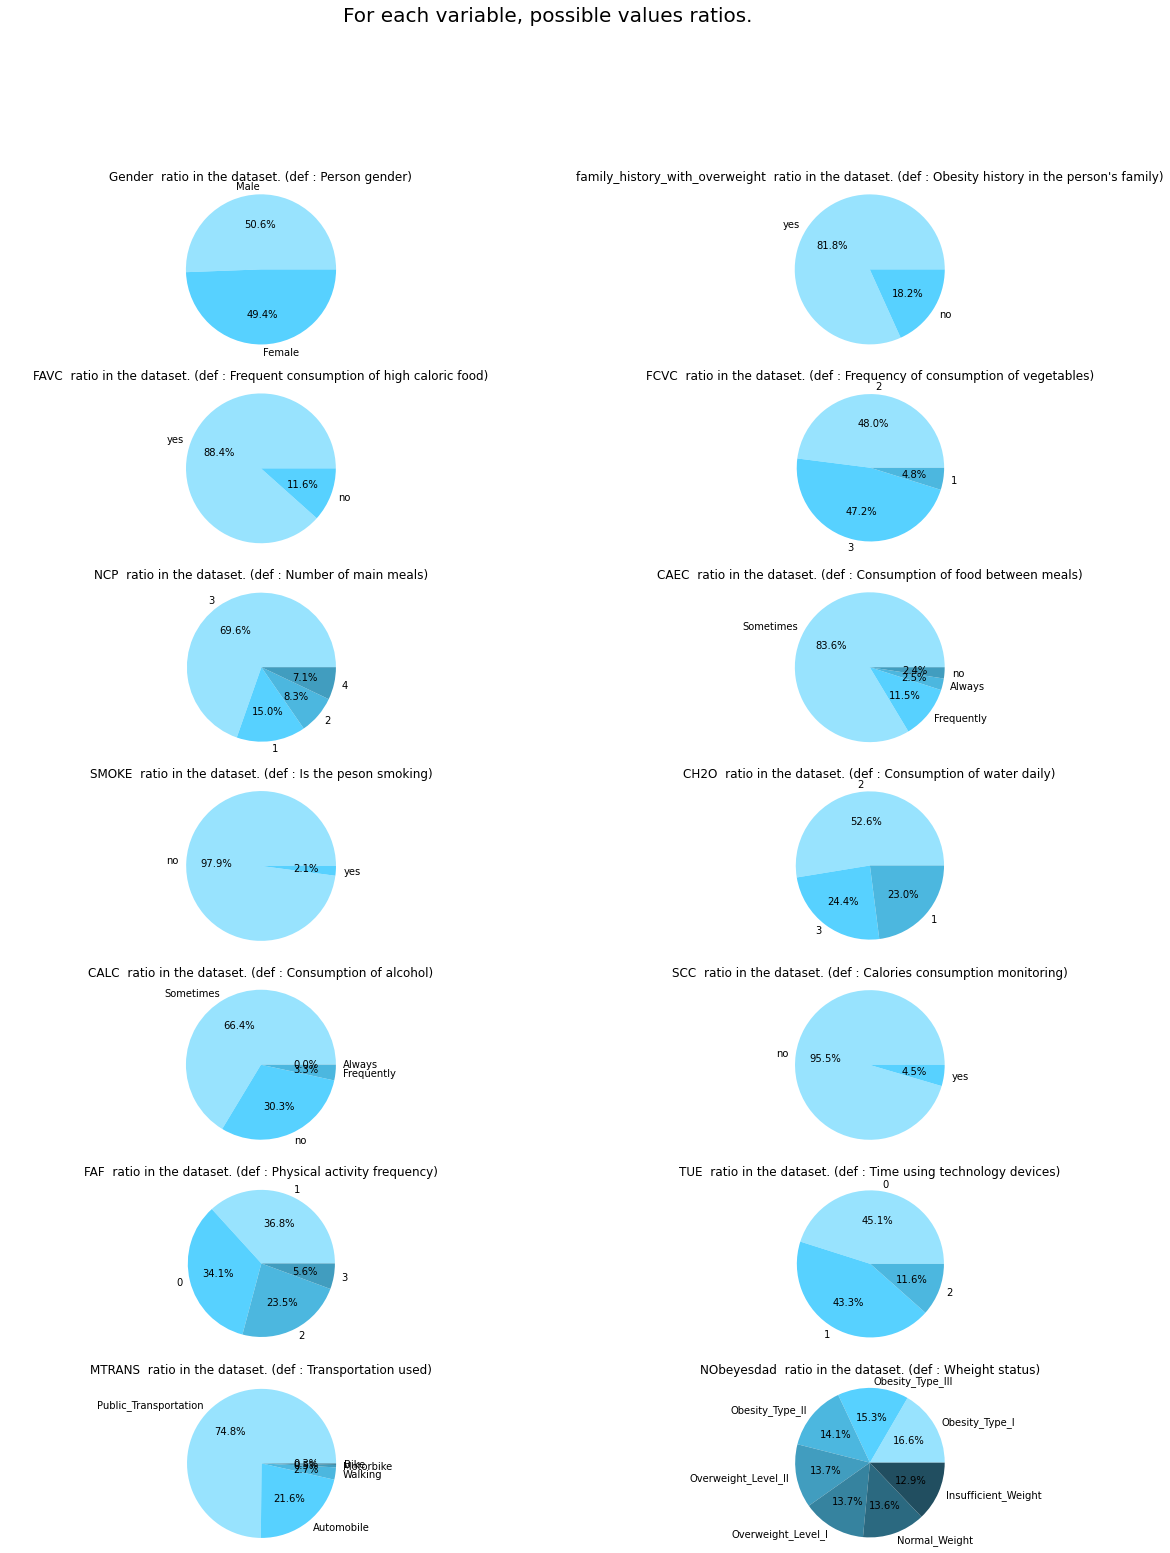

In [11]:
fig = plt.figure(figsize=(20,25))
fig.suptitle("For each variable, possible values ratios.", fontsize=20)

counter = 0

notDisplay = ["Age", "Height", "Weight"]

for variable, definition in zip(DataSignification['Variable'], DataSignification['Signification']):
    if variable not in notDisplay:
        counter = counter + 1
        ax = plt.subplot(7,2, counter)
        
        myTitle = variable + "  ratio in the dataset. (def : " + definition + ")"
        ax.title.set_text(myTitle)
        
        variableCount = obesity[variable].value_counts()
        variableCount.plot.pie(subplots = True,
                               colors = myBlueColors1,
                               autopct = '%1.1f%%'
                              )

        plt.axis("equal")
        plt.ylabel('')
    
plt.show()

The above function displays a pie chart for each variable having a fix set of possible values. Such charts only serve the purpose of better understanding the dataset population.
As shown by the above, the characteristics defining the population and the weight (object of the study) are well balanced (gender and weight status --> first and last pie charts)
The others should be the differentiating parameters when training our model in identifying obesity based on a set of parameters.

### Box plots for the physiological data

In [12]:
fig = plt.figure(figsize=(20,5))
fig.suptitle("Physological data.", fontsize=20)

counter = 0

Display = ["Age", "Height", "Weight"]


for variable, definition in zip(DataSignification['Variable'], DataSignification['Signification']):
    if variable in notDisplay:
        counter = counter + 1
        ax = plt.subplot(1,3, counter)
        
        myTitle = variable + "  values in the dataset. (def : " + definition + ")"
        ax.title.set_text(myTitle)
        ax.set_ylim([obesity[variable].min()*0.96, obesity[variable].max()*1.02])
        
        color = {'boxes': myColor1, 'whiskers': myColor2,
                 'medians': myColor3, 'caps': myColor1}
        obesity[variable].plot.box(subplots = True,
                                   color = color,
                                  )
        
        plt.ylabel(definition)
    
plt.show()

Those three bow plots show the data repartition of the physiological attributes. They are all well distributed. In the case of the age, the dataset population is quite young even if we have a bunch of outliers. Height and weight are well distributed.

In [13]:
from scipy.stats import skew

In [14]:
def skewness (data):
    skewness = skew(data)
    display = ''

    if skewness > 0:
        display = "Data is Positively or Right skewed. Skewness value: " + str(skewness)
    elif skewness < 0:
        display = "Data is Negatively or Left skewed. Skewness value: " + str(skewness)
    else:
        display = "Data is Normally distributed. Skewness value: " + str(skewness)

    return display

<AxesSubplot:>

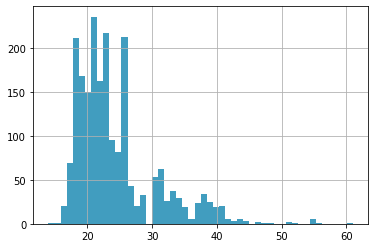

In [15]:
obesity['Age'].hist(bins=50, color = myBlueColors1[3])

In [16]:
print(skewness(obesity['Age']))

Data is Positively or Right skewed. Skewness value: 1.520244920562755


Looking at the histogram, we can easily see here that our age disribution is right skewed or has a positve skewed.

The skewness function confirms it to us

<AxesSubplot:>

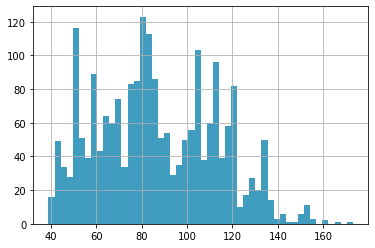

In [17]:
obesity['Weight'].hist(bins=50, color = myBlueColors1[3])

In [18]:
print(skewness(obesity['Weight']))

Data is Positively or Right skewed. Skewness value: 0.25524059695291496


More difficult to tell, but using the histogram only we can say the data is right skewed.

The skewness function confirms it to us

In [19]:
obesity['Height'].hist(bins=50, color = myBlueColors1[3])

<AxesSubplot:>

In [20]:
print(skewness(obesity['Height']))

Data is Negatively or Left skewed. Skewness value: -0.009108594183109648


Looking at the plot, we could say that the data is normally distributed. The skewness value is < 0.01. We can consider that the data is normally distributed.

In any case, when pre-processing the data, we are going to normalize the above quantitative features.

So, what is this dataset ?
It a dataset for machine learning on the subjet of obesity.
This dataset includes data for the estimation of obisty levels in individuals from the countries of Mexico, Peru and Colombia, based on their habits and physical condition.
The population of the dataset is well balanced between males and females as well as between all the weight status. Then we have pysiologicalata (height, wheight & age). Finally, we have 12 attributes that describes the eating habits and physical condition of the population.

## Analyse

### Scatter plots

As my dataset is not a time series (as ex.), scatter plots are not that relevent for all the variables. Hexbin would provide us with the same result. Indeed, most of the variables can only take a fix number of parameters as values.

Here are examples of scatter plots :

<AxesSubplot:xlabel='NObeyesdad', ylabel='FAF'>

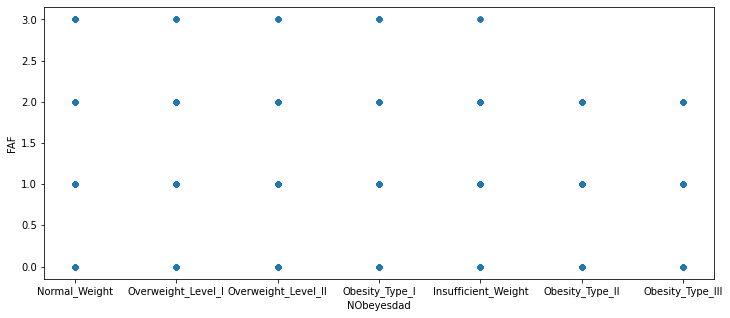

In [21]:
obesity.plot.scatter(x="NObeyesdad", y="FAF", figsize = (12,5))

As shown above, the FAF variable can only take 4 diffrent values. For each weight situation, the records dots are all superimposed.

Some of the variables have numbers as parameters but others have words :

<AxesSubplot:xlabel='NObeyesdad', ylabel='FAVC'>

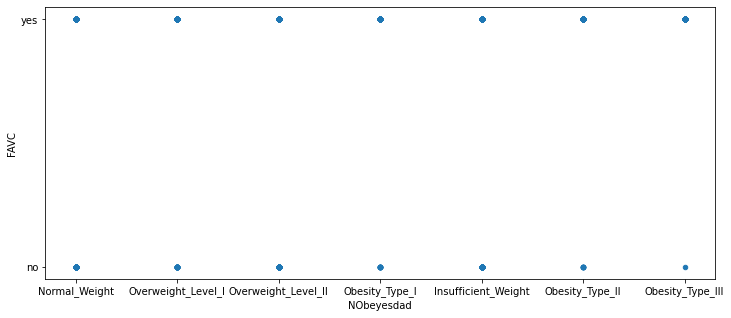

In [22]:
obesity.plot.scatter(x="NObeyesdad", y="FAVC", figsize = (12,5))

But, some variables can take an infinity of values : the physiological one. We can do scatter plots and then color the dots using a third variable like the obesity for the color.

Then, to try and understand the correlations with other variables, we can make the size of the dots vary.

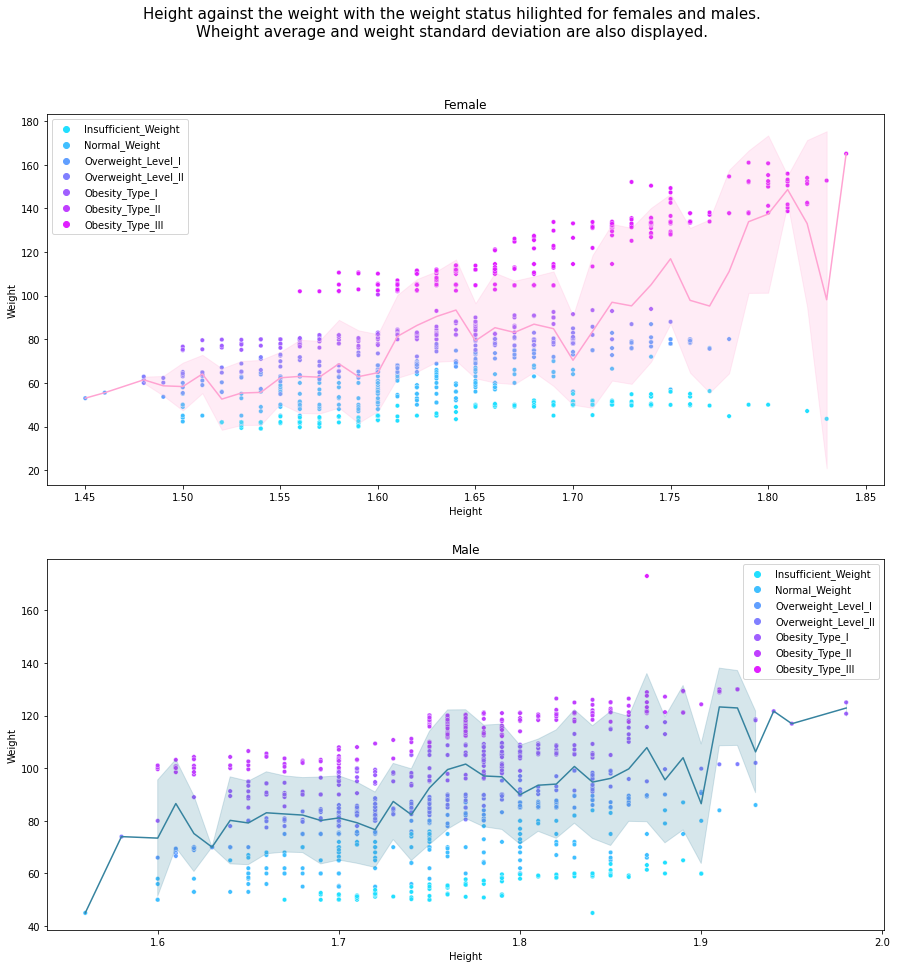

In [23]:
fig, axes = plt.subplots(2,1,figsize=(15,15))
fig.suptitle("Height against the weight with the weight status hilighted for females and males.\nWheight average and weight standard deviation are also displayed.", fontsize=15)

settings_f = ("Female", myColor2, axes[0])
settings_h = ("Male", myColor1, axes[1])

hue_order = ['Insufficient_Weight', 'Normal_Weight',
             'Overweight_Level_I', 'Overweight_Level_II', 
             'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'
            ]

for sexe, color, ax in [settings_f, settings_h]:
    ax.set_title(sexe)
    mask = obesity['Gender']==sexe
    data = obesity[mask]
    avg_weight = data.groupby('Height')['Weight'].mean()
    std_weight = data.groupby('Height')['Weight'].std()
    inf = avg_weight - std_weight
    sup = avg_weight + std_weight
    sns.scatterplot(data=data, x='Height', y='Weight',
                    hue='NObeyesdad', hue_order= hue_order,
                    palette = 'cool', s = 20, ax=ax
                   )
    sns.lineplot(data=avg_weight, color=color, ax=ax)
    ax.fill_between(avg_weight.index, inf, sup, color=color, alpha=0.2)

plt.show()

The above graphs are the height against the weight with :

    - The colors representing the weight status (cf. legend)
    - The line reprensenting the average weight
    - The fill between representing the standrad deviation 
Thanks to the above plots, we can see that the dataset is well spreaded in terms of weight status per height.

We now are ploting the age against the weight. The line and fill between do represent the same values as the above.

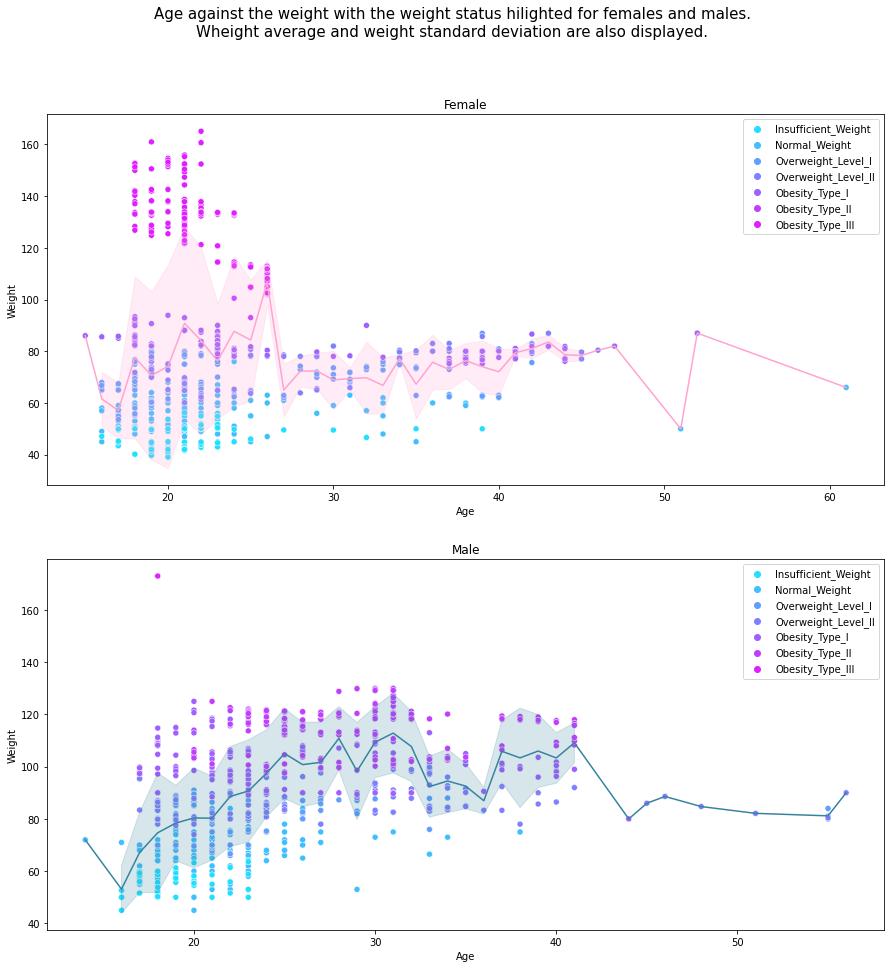

In [24]:
fig, axes = plt.subplots(2,1,figsize=(15,15))
fig.suptitle("Age against the weight with the weight status hilighted for females and males.\nWheight average and weight standard deviation are also displayed.", fontsize=15)

settings_f = ("Female", myColor2, axes[0])
settings_h = ("Male", myColor1, axes[1])

hue_order = ['Insufficient_Weight', 'Normal_Weight',
             'Overweight_Level_I', 'Overweight_Level_II', 
             'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'
            ]

for sexe, color, ax in [settings_f, settings_h]:
    mask = obesity['Gender']==sexe
    data = obesity[mask]
    avg_weight = data.groupby('Age')['Weight'].mean()
    std_weight = data.groupby('Age')['Weight'].std()
    inf = avg_weight - std_weight
    sup = avg_weight + std_weight
    sns.scatterplot(data=data, x='Age', y='Weight',
                    hue='NObeyesdad', hue_order= hue_order,
                    palette = 'cool', ax=ax
                   )
    sns.lineplot(data=avg_weight, color=color, ax=ax)
    ax.fill_between(avg_weight.index, inf, sup, color=color, alpha=0.2)
    ax.set_title(sexe)

plt.show()

### Understanding the data with scatter plots

Using seaborn, we can do a lot with scatter plots :

    - Map the color to a variable
    - Map the size to a variable
    - Add lines representing averages (Ex.)
    - Add a 'fill_between' reprensenting the standard deviation (Ex.)

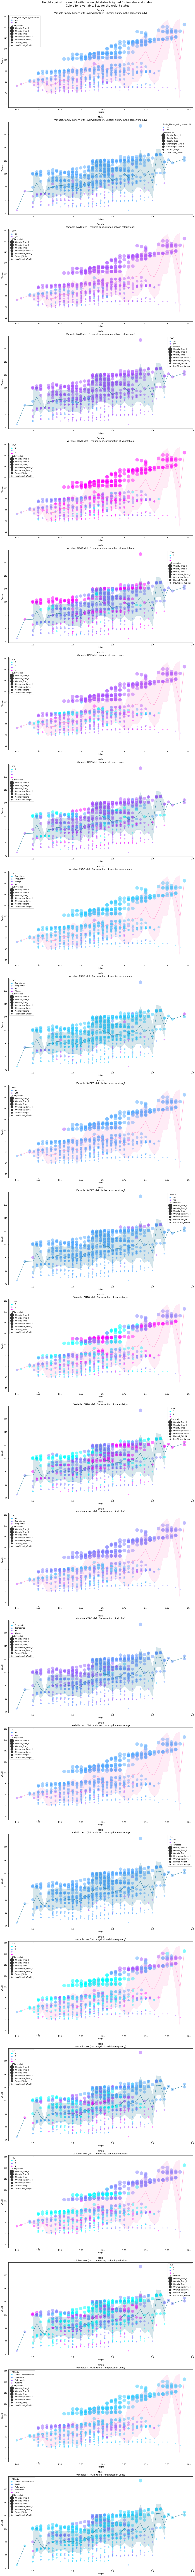

In [25]:
fig, axes = plt.subplots(24,1,figsize=(15,200), constrained_layout = True)
fig.suptitle("Height against the weight with the weight status hilighted for females and males.\nColors for a variable, Size for the weight status", fontsize=15)

settings_f = ("Female", myColor2)
settings_h = ("Male", myColor1)

size_order = ['Obesity_Type_III', 'Obesity_Type_II', 'Obesity_Type_I',
              'Overweight_Level_II', 'Overweight_Level_I', 
              'Normal_Weight', 'Insufficient_Weight'
             ]

count = 0
notDisplay = ['Height', 'Age', 'Weight', 'Gender', 'NObeyesdad']

for variable, definition in zip(DataSignification['Variable'], DataSignification['Signification']):
    for sexe, color in [settings_f, settings_h]:
        if variable not in notDisplay:
            ax = axes[count]
            count = count + 1
            mask = obesity['Gender']==sexe
            data = obesity[mask]

            avg_weight = data.groupby('Height')['Weight'].mean()
            std_weight = data.groupby('Height')['Weight'].std()
            inf = avg_weight - std_weight
            sup = avg_weight + std_weight

            sns.scatterplot(data = data, x = 'Height', y = 'Weight',
                            hue = variable, 
                            size = 'NObeyesdad', sizes = (40, 400), size_order = size_order, alpha = .5,
                            palette = 'cool', ax = ax
                           )
            sns.lineplot(data=avg_weight, color=color, ax=ax)
            ax.fill_between(avg_weight.index, inf, sup, color=color, alpha=0.2)
            ax.set_title(sexe + '\nVariable: ' + variable + " (def : " + definition + ")")



Thanks to the aboves graphs, we can interpret the correlation between the phisiological variables and the other parameters.

Those graphs are quite straight forward and easy to understand. The help see obvious correlation between our point of interest, weight, and physiological as well as the other features.

Before trying to interpret all those graphs we are going to use another method to plot the dataset data : pie charts.

### Understanding the data with pie charts

In [26]:
obesity.NObeyesdad.unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

As shown by the line of code above, we can identify 4 diffrent weight states:
    
    1. Insufficient Weight
    2. Normal Weight
    3. Overweight Levels (I and II)
    4. Obesity Type (I, II and III)

To try and better understand if any of the parameters are more specific to any of the above weight states. Do overweight people smoke more ? Do they have a more frequent consumption of caloric food ? Etc.
First lets divide the dataset in 4 mask, each corresponding to one weight state, and then plot pie charts in trying to identify differenciating parameters.

The 4 masks we are going to create will be in the same order as the list above : mask_1 --> Insufficient Weight, etc.

In [27]:
mask_1 = obesity[(obesity['NObeyesdad']=='Insufficient_Weight')]
mask_2 = obesity[(obesity['NObeyesdad']=='Normal_Weight')]
mask_3 = obesity[(obesity['NObeyesdad']=='Overweight_Level_I') | (obesity['NObeyesdad'] == 'Overweight_Level_II')]
mask_4 = obesity[(obesity['NObeyesdad']=='Obesity_Type_I') | (obesity['NObeyesdad'] == 'Obesity_Type_II') | (obesity['NObeyesdad'] == 'Obesity_Type_III')]

In [28]:
fig = plt.figure(figsize=(20,30))

counter = 0

notDisplay = ["Age", "Height", "Weight", "NObeyesdad"]
masks = ['Insufficient Weight', 'Normal weight', 'Overweight level I or II', 'Obesity type I, II or III']

for variable, definition in zip(DataSignification['Variable'], DataSignification['Signification']):
    if variable not in notDisplay:
        for i in range(1,5):
            counter = counter + 1
            ax = plt.subplot(13, 4, counter)
            myTitle = variable + ' ratio' + '\n' + masks[i-1] + "\n(def : " + definition + ")" 
            ax.title.set_text(myTitle)
            
            mask = locals()["mask_"+str(i)]
            variableCount = mask[variable].value_counts()
            variableCount.plot.pie(subplots = True,
                               colors = myBlueColors1,
                               autopct = '%1.1f%%'
                              )
            plt.axis("equal")
            plt.ylabel('')
            plt.subplots_adjust(top = 2)

plt.show()

### Ploting conclusion & dataset interpretation

The pie charts and scatter plots we obtained are both great. On one hand, the scatter plots allow us to compare the weight status to more features, giving us more complete graphs. On the other hand, pie charts are very easy to read and interpret with giving us a more precise reading (percentage). In the end, both plot types are useful to cross information and better understand the dataset before doing any machine learning.

Let's now interpret all the above charts. I am going to go row by row :

    1. Gender:
        Normal weight, overweight & obesity: gender does not seem to be related to those variables.
        Insufficient weight: it seems that females are more likely to have an insufficient weight than males.
    
    2. Obesity history in the person's family:
        Having an obesity historic in the person's family seems to influence towards normal weight or insufficient weight.
        On the other hand, the large majority of overweight and obese people do not have any obesity history in their family.
    
    3. Frequent consumption of high caloric food:
        Intuitive results : Heavier is the person, higher is his high caloric food consumption frequency.
        Insufficient weight people also consume more caloric food than people with a normal weight.

    4. Frequency of consumption of vegetables:
        Does not seems to be such a differentiating factor. Obese people seems to be the one with the highest frequency of vegetables consumption.

    5. Number of main meals:
        The large majority (+70%) of obese and normal weight people eat 3 main meals per day.
        26.5% of the people having an insufficuent weight eat 4 main meals per day.
        
    6. Consumption of food between meals:
        96.1% of obese people and 87.2% of overweight people consume sometimes food between meals.
        28.9% of normal weight people and 44.5% of insufficient weight people consume frequently food between meals.
        
    7. Smoking:
        Just a really small number of smokers in the dataset.

    8. Consumption of water daily:
        Quite even, independent of the weight status. Overweight and obese people tend to consume a bit more water than people with a normal or insufficient way.

    9. Consumption of alcohol:
        Heavier the person, higher is the consumption of alcohol.

    10. Calories consumption monitoring:
        Higher the weight, less likely is the person to monitor its calories consumption.

    11. Physical activity frequency:
        Higher the weight, lower the physical activity frequency.

    12. Time using technology devices:
        Does not seems to be link to the weight.

    13. Transportation used:
        69.1% or more people use public transportation.
        Higher the weight higher is the use of Automobile as a transportation mean.
        11.1% of people with a normal weight walk. 2.2% or less of the rest walk.

### Heatmap

<AxesSubplot:>

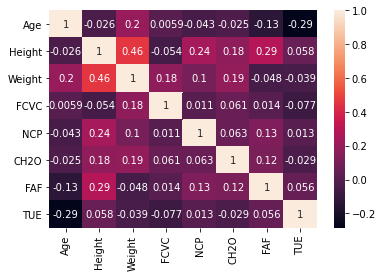

In [29]:
sns.heatmap(obesity.corr(), annot=True)


As a lot of our data is text we can't display all features using a heatmap. Moreover, the correlations are really low. The higest value is 0.46.

# Machine Leargning

Let's start doing some machine learning with scikit-learn

## Theory

The goal of using Machine Learning on this dataset is to determine the weight state of a person. Basically, we want to classify them into wieght classes (overweight, normal weight, etc.)

To identify which scikit-learn algorithm could correspond, I will use the following "cheat_sheet" helping to better understand which algorithm is suited to which dataset.

<img src="scikit-learn_cheat-shit.jpg">

Using my dataset :

    - >50 samples --> Yes
    - Predicting a category --> Yes
    - Labeled data --> Yes, I now know that I should use classification algorithms.
        - <100K samples --> Yes
        - Linear SVC
            - Working well --> Done!
            - Text Data 
                - Yes --> Naive Bayes
                - No --> KNeighbors Classifier
                    - Not working --> SVC / Ensemble classifiers

Both what I know and the cheat-sheet are pointing towards a classification problem. KNeighbors are not use in the case of text data. But as I will encode my data, we will be able to use this algorithm as well as SVC and EnsembleClassifiers.

## Libraries

In [30]:
pip install -U scikit-learn

All the library used are in the code cell below (in order of appearance).

In [36]:
import numpy as np
#---Transforming the y array. LabelEncoder is used to encode only one column
from sklearn.preprocessing import LabelEncoder
#---Scaler to normalize quantitative data
from sklearn.preprocessing import StandardScaler
#---Spliting the dataset into a training set and a testing set
from sklearn.model_selection import train_test_split
#---Machine learning model --> LinearSVC
from sklearn.svm import LinearSVC
#---Machine learning model --> KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
#---Machine learning model --> SVC
from sklearn.svm import SVC
#---Machine learning --> testing all the parameters of one model
from sklearn.model_selection import GridSearchCV
#---Metric to analyse performance --> confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
#---Metric --> learning curve of our model
from sklearn.model_selection import learning_curve

## Preprocessing
### Creating the two axes
First, we have to take our dataset and divide it into two vectors X and Y.

    - X will contain all the colomns excpet the last one: NObeyesdad
    - y will contain only the last colomn: NObeyesdad

What's NObeyesdad? It's the feature caracterising each persons' weight. This is the feature we want to be able to find with machine learning using all the other features. In ML terms, it is the 'label'.

The scikit learn library needs numpy arrays as inputs. But, we do not have to do any conversion as the Pandas library is build on top of the numpy architecture. The only modification we have to do is to separate the label colomn form the features columns.

In [32]:
Xraw = obesity.drop('NObeyesdad', axis = 1)
yRaw = obesity['NObeyesdad']

In [34]:
type(yRaw)

pandas.core.series.Series

In [32]:
Xraw.head()

Gender  Age  Height  Weight family_history_with_overweight FAVC  FCVC  NCP  \
0  Female   21    1.62    64.0                            yes   no     2    3   
1  Female   21    1.52    56.0                            yes   no     3    3   
2    Male   23    1.80    77.0                            yes   no     2    3   
3    Male   27    1.80    87.0                             no   no     3    3   
4    Male   22    1.78    89.8                             no   no     2    1   

        CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC                 MTRANS  
0  Sometimes    no     2   no    0    1          no  Public_Transportation  
1  Sometimes   yes     3  yes    3    0   Sometimes  Public_Transportation  
2  Sometimes    no     2   no    2    1  Frequently  Public_Transportation  
3  Sometimes    no     2   no    2    0  Frequently                Walking  
4  Sometimes    no     2   no    0    0   Sometimes  Public_Transportation

In [33]:
yRaw.head()

0          Normal_Weight
1          Normal_Weight
2          Normal_Weight
3     Overweight_Level_I
4    Overweight_Level_II
Name: NObeyesdad, dtype: object

To do any machine learning and allow algorithms to do any calculations, we have to present to the machine numerical values. It can't be words.

In other words, if the datatset contains any qualitative data (under text form), it has to be converted to numerical data. This conversion is called 'encoding'.

In the case of this dataset, we have a lot of non numerical data. But, on the other hand, those features can only take a finite number of possibilities.

### Encoding y

We are using here the funciton *LabelEncoder* that allows us to encode one AND ONLY ONE coloumn, perfect for y
At the end, the function *encoder.inverse_transform(numpy array)* allows to reverse the encoding

In [34]:
encoder = LabelEncoder()
y = encoder.fit_transform(yRaw)
y = pd.DataFrame(y, columns=["NObeyesdad"])
y

NObeyesdad
0              1
1              1
2              1
3              5
4              6
...          ...
2106           4
2107           4
2108           4
2109           4
2110           4

[2111 rows x 1 columns]

### Encoding X

As X contains qualitative data we have to encode it so it's readable by the machine learning algorithms. Here, we are going to use pandas' dummies.

In [35]:
X = pd.get_dummies(Xraw, columns = ['Gender',
                    'family_history_with_overweight',
                    'FAVC',
                    'CAEC',
                    'SMOKE',
                    'SCC',
                    'CALC',
                    'MTRANS'
                    ])
X

Age  Height  Weight  FCVC  NCP  CH2O  FAF  TUE  Gender_Female  \
0      21    1.62   64.00     2    3     2    0    1              1   
1      21    1.52   56.00     3    3     3    3    0              1   
2      23    1.80   77.00     2    3     2    2    1              0   
3      27    1.80   87.00     3    3     2    2    0              0   
4      22    1.78   89.80     2    1     2    0    0              0   
...   ...     ...     ...   ...  ...   ...  ...  ...            ...   
2106   21    1.71  131.41     3    3     2    2    1              1   
2107   22    1.75  133.74     3    3     2    1    1              1   
2108   23    1.75  133.69     3    3     2    1    1              1   
2109   24    1.74  133.35     3    3     3    1    1              1   
2110   24    1.74  133.47     3    3     3    1    1              1   

      Gender_Male  ...  SCC_yes  CALC_Always  CALC_Frequently  CALC_Sometimes  \
0               0  ...        0            0                0               0   
1               0  ...        1            0                0               1   
2               1  ...        0            0                1               0   
3               1  ...        0            0                1               0   
4               1  ...        0            0                0               1   
...           ...  ...      ...          ...              ...             ...   
2106            0  ...        0            0                0               1   
2107            0  ...        0            0                0               1   
2108            0  ...        0            0                0               1   
2109            0  ...        0            0                0               1   
2110            0  ...        0            0                0               1   

      CALC_no  MTRANS_Automobile  MTRANS_Bike  MTRANS_Motorbike  \
0           1                  0            0                 0   
1           0                  0            0                 0   
2           0                  0            0                 0   
3           0                  0            0                 0   
4           0                  0            0                 0   
...       ...                ...          ...               ...   
2106        0                  0            0                 0   
2107        0                  0            0                 0   
2108        0                  0            0                 0   
2109        0                  0            0                 0   
2110        0                  0            0                 0   

      MTRANS_Public_Transportation  MTRANS_Walking  
0                                1               0  
1                                1               0  
2                                1               0  
3                                0               1  
4                                1               0  
...                            ...             ...  
2106                             1               0  
2107                             1               0  
2108                             1               0  
2109                             1               0  
2110                             1               0  

[2111 rows x 31 columns]

Now that we have encoded all of our qualitative data, we have to normalize the quantitative data.
In y we don't have any data left to be pre-processed.

### Normalizing X

As X has qualitative and quatitative data, we have to both encode and normalize the data. To normalize the data we use the standard scaler and select the features we want it to be applied.

In [36]:
scaler = StandardScaler()
X[['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']] = scaler.fit_transform(X[['Age',
                                                                                              'Height',
                                                                                              'Weight',
                                                                                              'FCVC',
                                                                                              'NCP',
                                                                                              'CH2O',
                                                                                              'FAF',
                                                                                              'TUE']])
X

Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
0    -0.521741 -0.874380 -0.862558 -0.725454  0.385644 -0.021330 -1.124415   
1    -0.521741 -1.945660 -1.168077  0.987559  0.385644  1.431202  2.226606   
2    -0.207057  1.053924 -0.366089 -0.725454  0.385644 -0.021330  1.109599   
3     0.422312  1.053924  0.015809  0.987559  0.385644 -0.021330  1.109599   
4    -0.364399  0.839668  0.122741 -0.725454 -2.085053 -0.021330 -1.124415   
...        ...       ...       ...       ...       ...       ...       ...   
2106 -0.521741  0.089772  1.711821  0.987559  0.385644 -0.021330  1.109599   
2107 -0.364399  0.518284  1.800804  0.987559  0.385644 -0.021330 -0.007408   
2108 -0.207057  0.518284  1.798894  0.987559  0.385644 -0.021330 -0.007408   
2109 -0.049714  0.411156  1.785909  0.987559  0.385644  1.431202 -0.007408   
2110 -0.049714  0.411156  1.790492  0.987559  0.385644  1.431202 -0.007408   

           TUE  Gender_Female  Gender_Male  ...  SCC_yes  CALC_Always  \
0     0.497717              1            0  ...        0            0   
1    -0.986295              1            0  ...        1            0   
2     0.497717              0            1  ...        0            0   
3    -0.986295              0            1  ...        0            0   
4    -0.986295              0            1  ...        0            0   
...        ...            ...          ...  ...      ...          ...   
2106  0.497717              1            0  ...        0            0   
2107  0.497717              1            0  ...        0            0   
2108  0.497717              1            0  ...        0            0   
2109  0.497717              1            0  ...        0            0   
2110  0.497717              1            0  ...        0            0   

      CALC_Frequently  CALC_Sometimes  CALC_no  MTRANS_Automobile  \
0                   0               0        1                  0   
1                   0               1        0                  0   
2                   1               0        0                  0   
3                   1               0        0                  0   
4                   0               1        0                  0   
...               ...             ...      ...                ...   
2106                0               1        0                  0   
2107                0               1        0                  0   
2108                0               1        0                  0   
2109                0               1        0                  0   
2110                0               1        0                  0   

      MTRANS_Bike  MTRANS_Motorbike  MTRANS_Public_Transportation  \
0               0                 0                             1   
1               0                 0                             1   
2               0                 0                             1   
3               0                 0                             0   
4               0                 0                             1   
...           ...               ...                           ...   
2106            0                 0                             1   
2107            0                 0                             1   
2108            0                 0                             1   
2109            0                 0                             1   
2110            0                 0                             1   

      MTRANS_Walking  
0                  0  
1                  0  
2                  0  
3                  1  
4                  0  
...              ...  
2106               0  
2107               0  
2108               0  
2109               0  
2110               0  

[2111 rows x 31 columns]

### Creating the training and testing sets

As we have we'll begin with a test size of 15%

In [37]:
# Creating the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (1794, 31)
Test set: (317, 31)


## Machine Learning

We have created both a train and test sets. But, we cannot train our data using the train set and then test it with our test set to tweak hyperparameters. Even if the algroithm has not "seen" the test set, it's like it has thanks to us tweaking the hyperparameters to improve the score obtained with the test set. We have to use validation sets and only use the test set at the end, when we have chosen the right model.

In [38]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

### Linear SVC
#### Linear SVC the standard way
##### Fitting the *LinearSVC* model

In [40]:
model1 = LinearSVC()

model1.fit(X_train, y_train.values.ravel())

print('Train Score:', model1.score(X_train, y_train))

Train Score: 0.7837235228539576


c:\users\utilisateur\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


#### Linear SVC using GridSearchCV

GridSearchCV alows to easily test multiple hyperparameters

First, we create a dictionnary with all the diffrent hyperparameters and the diffrent values they can take

##### Creating the hyperparameters dictionnary

In [51]:
param_grid1 = {'loss': ['hinge', 'squared_hinge'],
              'tol': [1e-4, 1e-5, 1e-6],
              'multi_class': ['ovr', 'crammer_singer'],
              'max_iter': [100000]
             }

##### Fitting the LinearSVC model

In [ ]:
grid1 = GridSearchCV(LinearSVC(), param_grid1, cv=5)

grid1.fit(X_train, y_train.values.ravel())

##### Best score and parameters obtained

In [53]:
print('Best score obtained', grid1.best_score_)
print('Best parameters:', grid1.best_params_)

Best score obtained 0.9080422028913337
Best parameters: {'loss': 'hinge', 'max_iter': 100000, 'multi_class': 'crammer_singer', 'tol': 0.0001}


##### Testing the obtained model
Saving the model and testing it with our test set

In [54]:
model1 = grid1.best_estimator_
model1.score(X_test, y_test.values.ravel())

0.8832807570977917

##### Confusion matrix

In [65]:
confusion_matrix(y_test, model1.predict(X_test))

array([[32,  2,  1,  1,  0,  0,  0],
       [ 7, 17,  2,  1,  0,  4,  9],
       [ 0,  0, 47,  3,  0,  1,  0],
       [ 0,  0,  1, 52,  0,  1,  0],
       [ 0,  0,  0,  0, 39,  0,  0],
       [ 0,  7,  7,  1,  1, 30,  2],
       [ 1,  2,  2,  3,  0,  2, 39]], dtype=int64)

Values and matching classes:
	 0 --> Insufficient_Weight
	 1 --> Normal_Weight
	 2 --> Obesity_Type_I
	 3 --> Obesity_Type_II
	 4 --> Obesity_Type_III
	 5 --> Overweight_Level_I
	 6 --> Overweight_Level_II


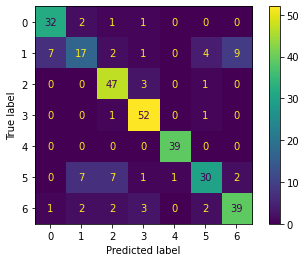

In [64]:
counter = 0
print('Values and matching classes:')
for state in encoder.classes_:
    print('\t', counter, '-->', state)
    counter+=1
plot_confusion_matrix(model1, X_test, y_test) 

##### Learning curves

In [67]:
N1, train_score1, val_score1 = learning_curve(model1, X_train, y_train.values.ravel(),
                                           train_sizes = np.linspace(0.1, 1.0, 10), cv=5)

c:\users\utilisateur\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\utilisateur\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\utilisateur\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\utilisateur\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\uti

c:\users\utilisateur\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\utilisateur\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\utilisateur\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\utilisateur\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\uti

[ 143  287  430  574  717  861 1004 1148 1291 1435]


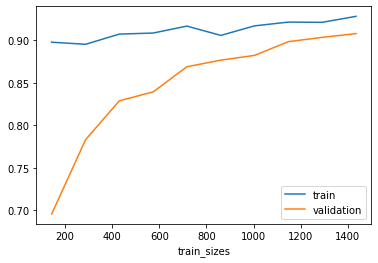

In [68]:
print(N1)
plt.plot(N1, train_score1.mean(axis=1), label = 'train')
plt.plot(N1, val_score1.mean(axis=1), label = 'validation')
plt.xlabel('train_sizes')
plt.legend()

### KNeighborsClassifier
#### KNeighborsClassifier the standard way
##### Fitting the *KNeighborsClassifier* model

In [55]:
model2 = KNeighborsClassifier()

model2.fit(X_train, y_train.values.ravel())

print('Train Score:', model2.score(X_train, y_train))
print('Test Score:', model2.score(X_test, y_test))

Train Score: 0.8717948717948718
Test Score: 0.7728706624605678


#### KNeighborsClassifier using GridSearchCV

##### Creating the hyperparameters dictionnary

In [56]:
param_grid2 = {'n_neighbors': np.arange(1,20),
              'algorithm': ['ball_tree', 'kd_tree', 'brute'],
              'weights': ['uniform', 'distance'],
              'metric':  ['euclidean', 'manhattan']
             }

##### Fitting the KNeighbors model

In [57]:
grid2 = GridSearchCV(KNeighborsClassifier(), param_grid2, cv=5)

grid2.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'weights': ['uniform', 'distance']})

##### Best score and parameters obtained

We can then get the best score obtained and the parameters that were used with it

In [58]:
print('Best score obtained', grid2.best_score_)
print('Best parameters:', grid2.best_params_)

Best score obtained 0.8533978618446646
Best parameters: {'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


##### Testing the obtained model

Saving the model and testing it with our test set

In [59]:
model2 = grid2.best_estimator_
model2.score(X_test, y_test.values.ravel())

0.807570977917981

##### Confusion matrix

In [60]:
confusion_matrix(y_test, model2.predict(X_test))

array([[32,  2,  1,  1,  0,  0,  0],
       [ 7, 17,  2,  1,  0,  4,  9],
       [ 0,  0, 47,  3,  0,  1,  0],
       [ 0,  0,  1, 52,  0,  1,  0],
       [ 0,  0,  0,  0, 39,  0,  0],
       [ 0,  7,  7,  1,  1, 30,  2],
       [ 1,  2,  2,  3,  0,  2, 39]], dtype=int64)

Values and matching classes:
	 0 --> Insufficient_Weight
	 1 --> Normal_Weight
	 2 --> Obesity_Type_I
	 3 --> Obesity_Type_II
	 4 --> Obesity_Type_III
	 5 --> Overweight_Level_I
	 6 --> Overweight_Level_II


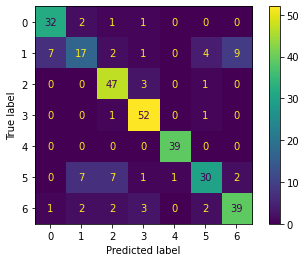

In [61]:
counter = 0
print('Values and matching classes:')
for state in encoder.classes_:
    print('\t', counter, '-->', state)
    counter+=1
plot_confusion_matrix(model2, X_test, y_test) 

##### Learning curves

[ 143  287  430  574  717  861 1004 1148 1291 1435]


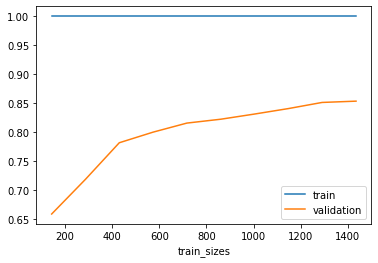

In [63]:
N2, train_score2, val_score2 = learning_curve(model2, X_train, y_train.values.ravel(),
                                           train_sizes = np.linspace(0.1, 1.0, 10), cv=5)

print(N2)
plt.plot(N2, train_score2.mean(axis=1), label = 'train')
plt.plot(N2, val_score2.mean(axis=1), label = 'validation')
plt.xlabel('train_sizes')
plt.legend()

As shown by the above graph, having more data should benefit this model. Indeed, the curves have not reached yet there tangent. The top of the curve is not flat.

### SVC
#### SVC the standard way


##### Fitting the *SVC* model

In [109]:
model3 = SVC()

model3.fit(X_train, y_train.values.ravel())

print('Train Score:', model3.score(X_train, y_train))

Train Score: 0.9581939799331104


#### SVC using GridSearchCV

##### Creating the hyperparameters dictionnary

In [87]:
param_grid3 = {'C': [0.1, 1, 10, 100, 1000],
               'shrinking': [True, False],
               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
               'kernel':  ['poly', 'rbf', 'sigmoid'],
               'decision_function_shape': ['ovo', 'ovr'],
               'probability': [True]
              }

##### Fitting the SVC model

In [88]:
grid3 = GridSearchCV(SVC(), param_grid3, cv=5)

grid3.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['poly', 'rbf', 'sigmoid'],
                         'probability': [True], 'shrinking': [True, False]})

##### Best score and parameters obtained

We can then get the best score obtained and the parameters that were used with it

In [89]:
print('Best score obtained', grid3.best_score_)
print('Best parameters:', grid3.best_params_)

Best score obtained 0.9648807208104448
Best parameters: {'C': 1000, 'decision_function_shape': 'ovo', 'gamma': 0.001, 'kernel': 'rbf', 'probability': True, 'shrinking': True}


##### Testing the obtained model

Saving the model and testing it with our test set

In [90]:
model3 = grid3.best_estimator_
model3.score(X_test, y_test.values.ravel())

0.9589905362776026

##### Confusion matrix

In [91]:
confusion_matrix(y_test, model3.predict(X_test))

array([[36,  0,  0,  0,  0,  0,  0],
       [ 2, 36,  0,  0,  0,  2,  0],
       [ 0,  0, 50,  0,  0,  0,  1],
       [ 0,  0,  2, 51,  1,  0,  0],
       [ 0,  0,  0,  1, 38,  0,  0],
       [ 0,  3,  0,  0,  0, 45,  0],
       [ 0,  0,  0,  0,  0,  1, 48]], dtype=int64)

Values and matching classes:
	 0 --> Insufficient_Weight
	 1 --> Normal_Weight
	 2 --> Obesity_Type_I
	 3 --> Obesity_Type_II
	 4 --> Obesity_Type_III
	 5 --> Overweight_Level_I
	 6 --> Overweight_Level_II


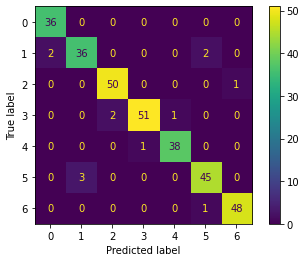

In [93]:
counter = 0
print('Values and matching classes:')
for state in encoder.classes_:
    print('\t', counter, '-->', state)
    counter+=1
plot_confusion_matrix(model3, X_test, y_test) 

##### Learning curves

In [94]:
N3, train_score3, val_score3 = learning_curve(model3, X_train, y_train.values.ravel(),
                                           train_sizes = np.linspace(0.1, 1.0, 10), cv=5)

print(N3)
plt.plot(N3, train_score3.mean(axis=1), label = 'train')
plt.plot(N3, val_score3.mean(axis=1), label = 'validation')
plt.xlabel('train_sizes')
plt.legend()

[ 143  287  430  574  717  861 1004 1148 1291 1435]


In this case, both cruves seem to have reached their tangent meaning that more data would be useless in this case.